In [1]:
import numpy as np

In [2]:
import sys 
!conda install --yes --prefix {sys.prefix} numpy

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\luise\anaconda3\envs\py_galileo_2021

  added / updated specs:
    - numpy


The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2020.10.14-0 --> pkgs/main::ca-certificates-2021.1.19-haa95532_1
  certifi                anaconda::certifi-2020.6.20-py38_0 --> pkgs/main::certifi-2020.12.5-py38haa95532_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [3]:
import matplotlib.pyplot as plt

**ejercicio** : en data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diference espaciamiento ,por ejemplo:

[0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ]
       
El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.

Usando unicamente NumPy crea un vector de este tipo con el nombre xs .

**nota**: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de numpy

In [4]:
# tu codigo aqui (~ 5 lineas de codigo):
x = np.linspace(0,0.5,6)
y = np.linspace(0.51,.59,9)
z = np.linspace(0.6,1,5)
np.hstack((x,y,z))

array([0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ])

**Ejercicio (parte de tarea)** En este caso usamos un ciclo  para ejemplificar pero ya hemos mencionado que debemos evitarlos siempre que sea posible y usar operaciones "vectorizadas" ya que es mucho mas rápido al utilizar  código pre-compilado de C, en este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for. 

**tip**: usar slicing

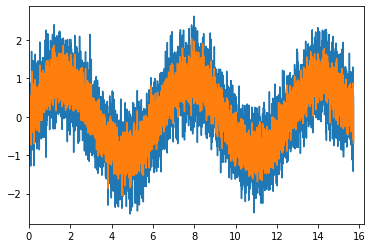

In [5]:
sample_points = 10000
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#xs es "x suavizado", inicialmente es una copia de x
ys =  y.copy()

tmp = np.cumsum(y, dtype=float)
tmp[3:] = tmp[3:] - tmp[:-3]

ys = np.hstack((y[0], tmp[2:]/3, y[-1]))  

plt.plot(x,y)
plt.plot(x,ys)
plt.xlim(0,5*np.pi + 0.5)
plt.show()

Ejercicio Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5 , 0.31127812]

Nota: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

$$𝑆=−∑𝑖𝑛𝑃(𝑥𝑖)𝑙𝑜𝑔2𝑃(𝑥𝑖)$$

In [6]:
def calcular_entropia(px):
    return (np.log2(px)*px)*-1

print(calcular_entropia([0.25,0.75]))


[0.5        0.31127812]


Ejercicio : se ha determinado también que hay costos asociados a la comunicación y relación con los clientes(llamadas,mensajes electrónicos,etc) y que estos también tienen alta correlación con el monto que estos gastan en su primer més siguiendo el modelo:
$$c(x) = (x^{2} + x + log (0.0001x)-\sqrt{0.54x})/100$$
 
Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función ganancia_neta(x,g,c) donde:

x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
g = función que estima la ganancia en función de x
c = función que estima el costo en función de x
La función realiza el calculo simple g(x) - c(x) , ya que es posible que los modelos cambien en el tiempo es común recibir como parámetro el modelo o modelos hijos de un modelo mas grande , en este caso eso se logra recibiendo como parámetro las funciones de ganancia y costo.

In [7]:
def ganancia2(x):
    return np.power(x,2)

def costos(x):
    return np.sqrt(x)

In [8]:
def ganancia_neta(x,g,c):
    return g(x) - c(x)
print(x)
ganancia_neta(x,ganancia2,costos) # se pasa una función como argumento

[0.00000000e+00 1.57095342e-03 3.14190684e-03 ... 1.57048214e+01
 1.57063923e+01 1.57079633e+01]


array([ 0.00000000e+00, -3.96327869e-02, -5.60428433e-02, ...,
        2.42678483e+02,  2.42727630e+02,  2.42776783e+02])

**Ejercicio** Usando argmax (obtiene la posición) crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo) #moda y conteo (usar conteo de diccionarios)

tip investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos

In [9]:
from collections import Counter
def mode(x):
    ## tu codigo aqui (~ 3 lineas de codigo):
    counter =  Counter(x)
    valor = max(counter, key=counter.get)
    conteo = counter.get(valor)
    return valor, conteo

x = np.array([1,2,3,4,5,5,6,7,8,8,8])
print(mode(x))

(8, 3)


**Ejercicio** : crear una función para calcular la entropía  de una distribución de probabilidad representada como un vector.
$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

**Nota**: a diferencia del ejercicio anterior donde solo calculamos los términos de la entropía, en este caso  si calculamos el valor completo de la entropía, que como mencionamos es una medida de incerteza en una distribución de probabilidad.

**recordatorio**: no usar ciclos solo operaciones vectorizadas.

In [10]:
# tu codigo aqui (~ 4 lineas de codigo)
def calcular_entropia(px):
    resul = np.sum((np.log2(px)*px)*-1)
    return resul

print(calcular_entropia([0.25,0.75]))

0.8112781244591328


**Ejercicio**: En ML usamos la entropía cruzada como una forma de medir que tan bueno es un modelo de variables discretas a través de comparar la distribución de probabilidad que el modelo produce o predice, vs la distribución de probabilidad real dada por los datos de entrenamiento.

Podemos ver el siguiente ejemplo que define la forma en que se calcula la entropía cruzada y nos muestra un caso específico:

<img src="https://image.slidesharecdn.com/publishintroductiontodeeplearninginpythonandmatlab1-160502102437/95/introduction-to-deep-learning-in-python-and-matlab-54-638.jpg?cb=1462185644">

En este caso interpretamos así: El problema consiste en un modelo o algoritmo de ML que debe producir un vector de 3 elementos indicando la probabilidad de que ciertos datos X pertenezcan a una de 3 categorías.

* El modelo de ML produce un vector que indica que estima un 70% de probabilidad de que se trate de la categoría 0, 20% de probabilidad de que se trate de la categoría 1 y 10% de que se trate de la categoría 2.
* Los datos reales nos dicen que se trataba de un caso donde con total certeza se sabe que se trata de la categoría 0
* La entropía cruzada(a calcular en el ejercicio) nos indica que tan buena es la estimación del modelo, una EC de 0 es un modelo perfecto(en este caso un modelo que predice 100% de prob para la clase 0)

**Nota** 
* Aun que para calcular la entropía usamos logaritmos en base 2, en ML para calcular la entropía cruzada se usa logaritmo natural ya que con este se cumple el proposito **estimar que tanto se alejan las predicciones del modelo de ML de los datos reales** y es comunmente mas rápido de calcular en la computadora.
* Ya que estamos trabajando con vectores que representan distribuciones de probabilidad , podemos toparnos con lo que se conoce como : **sparse vectors**(vectores donde la mayoría de elementos son 0), esto puede producir problemas ya que le logaritmo de 0 no esta definido, tu solución debe tomar en cuenta esto y evitar que devuelva "nan"

In [11]:
def cross_entropy(Y,Y_hat):
    ##tu codigo aqui (~ 1 lineas de codigo) Usar log natural
    resul = np.sum((np.log(Y_hat)*Y)*-1)
    return resul
    

y  = np.array([1.0,0,0]) ##vector de la realidad
y_hat = np.array([0.7,0.2,0.1]) ## vector del modelo predictivo

cross_entropy(y,y_hat)

0.35667494393873245

**ejercicio** : crear una función que reciba como parámetro un vector x y calcule su magnitud o norma(euclidiana o L2) ,luego usarla para evaluar 2 vectores que representan los errores generados por 2 modelos de machine learning y concluir cual de los 2 modelos es mejor.

In [12]:
def magnitud(x):
    ## tu codigo aqui (~ 1 linea de codigo)
    norma = np.sqrt(x @ x)
    return norma

errores_modelo1 = np.array([1,2,1,2])
errores_modelo2 = np.array([0,1,1,2])

print(magnitud(errores_modelo1))
print(magnitud(errores_modelo2))

3.1622776601683795
2.449489742783178


**ejercicio** Usando la función del ejercicio anterior, crea otra función normalizar(x) que reciba de parámetro un vector x aplique normalización sobre este, el resultado debe ser un nuevo vector del tamaño de x cuya magnitud es igual a 1.0

In [13]:
def normalizar(x):
    ## tu codigo aqui (~ 3 linea de codigo)
    print(x)
    return(x/magnitud(x))
    
print(magnitud(normalizar(errores_modelo1)))
print(magnitud(normalizar(errores_modelo2)))

[1 2 1 2]
1.0
[0 1 1 2]
1.0


**Ejercicio aplicado en DS**
Se tiene una red neuronal sencilla(y simplificada) como la de la siguiente imagen:
<img src="https://www.oreilly.com/library/view/practical-convolutional-neural/9781788392303/assets/246151fb-7893-448d-b9bb-7a87b387a24b.png">

Donde:
* INPUT LAYER: un vector X de tamaño = 2 que representa los datos de entrada
* HIDDEN_LAYER :capa oculta con 2 neuronas definidas por los vectores:
    * HL1 = [0.25,0.37]
    * HL2 = [-8,14]
* OUTPUT_LAYER = capa de salida definida por el vector [4,9]

Crear una funcion neural_network(X) para calcular:
* Calcule la salida de cada neurona en la capa intermedia aplicada a la capa de entrada.
* Use el resultado del paso anterior como entrada para la neurona en la capa de salida

Asumiendo que cada neurona identifica la similitud entre su entrada y la caracteística que representa concluir:
* Para cada vector de entrada Xi , cual neurona intermedia busca la característica que mas se parece a X.
* Cual vector de entrada Xi produce una activación alta(salida alta) en la capa de salida.

In [75]:
# Aplicar la red neuronal sobre los siguientes datos X

X1 = np.array([0.50,0.72])
X2 = np.array([-4,7])
X3 = np.zeros_like(X2)
X4 = np.ones_like(X1)
X5 = np.random.randn(X1.shape[0])

HL1 = np.array([0.25,0.37])
HL2 = np.array([-8,14])
OUTPUT_LAYER = np.array([4,9])

def neural_network(X) :
    HL1_dot = np.dot(X,HL1)
    HL2_dot = np.dot(X,HL2)
    
    #HIDDEN_LAYER
    HL = np.array([HL1_dot,HL2_dot])
    
    #OUTPUT_LAYER
    return np.dot(HL, OUTPUT_LAYER)

print("X1:",neural_network(X1), 
      "X2:",neural_network(X2), 
      "X3:",neural_network(X3), 
      "X4:",neural_network(X4), 
      "X5:",neural_network(X5))

X1: 56.2856 X2: 1176.36 X3: 0.0 X4: 56.48 X5: 103.5896908536074


**Ejercicio aplicado en DS**: la correlación cruzada es una medida de similitud entre 2 funciones como resultado de "desplazar" una sobre la otra, comunmente es usada para encontrar características relevantes en una función desconocida o no controlada.

En procesamiento de señales por ejemplo es usada para buscar y/o filtrar en una señal que varia en el tiempo cierta caracaterística de interés. Aveces es llamada también "sliding dot product" consiste en aplicar en cada punto de una función F el producto punto con cierta función G(comunmente mas corta) y luego "deslizar" G a un nuevo punto de la función, el resultado es una nueva función H (la gráfica de abajo) que se interpreta como :**cuanto se parece** en cada punto la función F a la característica G. 

<img src="https://i.makeagif.com/media/11-25-2015/LZ9Ufj.gif">

En este ejercicio usamos correlación cruzada para calcular las medias moviles promediando 3 puntos que ya vimos en otro ejemplo:

El primer paso es definir la función G que define el "filtro" a aplicar, para este caso consiste simplemente en un vector con 3 elementos donde cada elemento corresponde a 1/3, luego debemos aplicar el producto punto sobre cada punto de la función o datos originales(en este ejemplo llamados x) a traves aplicar el producto punto en cada elemento "corriendolo" de uno en uno

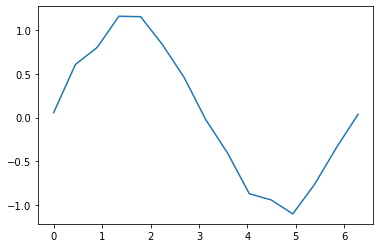

In [67]:
ruido = 0.1*np.random.randn(15) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,2*np.pi,15) 
y = np.sin(x) +ruido ##función F
## usar producto punto
filtro = np.array([1/3,1/3,1/3]) ## esta es la función G

# para lograr las medias móviles a través de correlación cruzada
plt.plot(x,y)


**ejercicio** Implementar la función:
$$h(x) = \begin{cases}0 & x< 0\\1 & 0<=x <=1\\0 & x> 1\end{cases}$$

Esta debe funcionar para vectores de cualquier tamaño x:

def h(x):

    ...

**nota** debe ser implementada sin ciclos o ifs 

In [18]:
## tu codigo aqui (~ 3 linea de codigo)
def h(x):
    h = ((x<0) * (0)
        + ((x>=0)&(x<=1)) * (1)
        + (x>1) *(0))
    
    return h

x = np.array([0.1,-2,0.5,5])
print(h(x))

[1 0 1 0]


**Ejercicio**

Usando select implementar una función k(x) con la siguiente definición:
$$k(x) = \begin{cases}-x & x< 0\\x^{3}  &0<=x<1\\x^{2}  &1<=x<2\\4  &otherwise\end{cases}$$


In [25]:
def k(x):
    condiciones = [x<0,(x>=0) & (x<1),(x>=1)&(x<2)]
    resultados =  [x*-1, x**3, x**2]
    k = np.select(condiciones,resultados,4)
    return k

x = np.array([0.1,-2,0.5,5])
print(x)
print(k(x))

[ 0.1 -2.   0.5  5. ]
[1.00e-03 2.00e+00 1.25e-01 4.00e+00]


**Ejercicio** 
Investigar piecewise y:
*  Usarlo para implementar la función anterior de manera eficiente
*  Usar piscewise para implementar la función:

$$m(x) = \begin{cases}e^{2x} & x< 0\\1  &0<=x<1\\e^{1-x}  &x<=1\\\end{cases}$$

Nuevamente, sin utilizar ciclos ni ifs

In [65]:
def m(x):
    k=np.piecewise(x,[x<0,(x>=0) & (x<1),x>=1],[lambda x:np.exp(2*x),lambda x:1,lambda x:np.exp(1-x)])
    return k

x = np.array([0.1,-2,0.5,6])
print(x)
print(m(x))

[ 0.1 -2.   0.5  6. ]
[1.         0.01831564 1.         0.00673795]
